In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("/kaggle/input/cancer-subtype/TCGA-PANCAN-HiSeq-801x20531/data.csv")

In [6]:
data.shape

(801, 20532)

In [7]:
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [8]:
labels = pd.read_csv("/kaggle/input/cancer-subtype/TCGA-PANCAN-HiSeq-801x20531/labels.csv")

In [9]:
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [10]:
labels.isnull().any()

Unnamed: 0    False
Class         False
dtype: bool

In [11]:
data.isnull().any()

Unnamed: 0    False
gene_0        False
gene_1        False
gene_2        False
gene_3        False
              ...  
gene_20526    False
gene_20527    False
gene_20528    False
gene_20529    False
gene_20530    False
Length: 20532, dtype: bool

In [12]:
np.unique(labels['Class'].values)

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [13]:
data['class'] = labels['Class']

In [14]:
data.columns

Index(['Unnamed: 0', 'gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4',
       'gene_5', 'gene_6', 'gene_7', 'gene_8',
       ...
       'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525', 'gene_20526',
       'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530', 'class'],
      dtype='object', length=20533)

In [15]:
label_counts = data['class'].value_counts()

In [16]:
label_counts

class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64

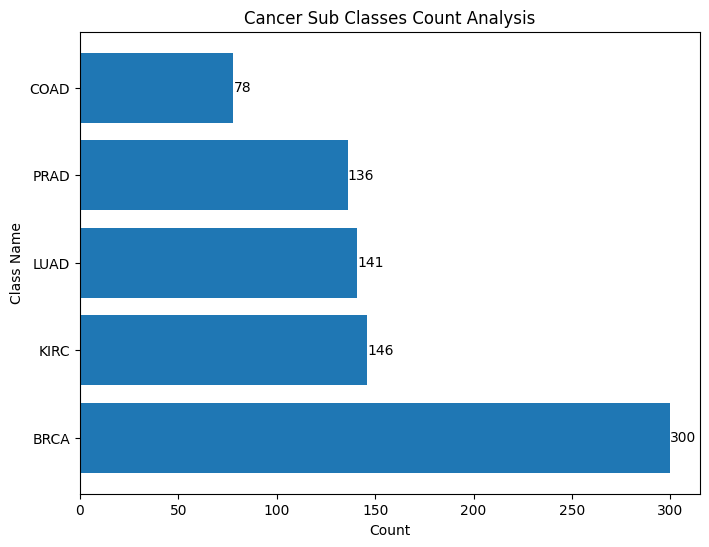

In [17]:
plt.figure(figsize=(8, 6))
bars = plt.barh(label_counts.index, label_counts.values)
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=10)
plt.xlabel("Count")
plt.ylabel("Class Name")
plt.title("Cancer Sub Classes Count Analysis")
plt.show()

In [18]:
data_BRCA = data[data['class'] == "BRCA"]
data_COAD = data[data['class'] == "COAD"]
data_KIRC = data[data['class'] == "KIRC"]
data_LUAD = data[data['class'] == "LUAD"]
data_PRAD = data[data['class'] == "PRAD"]

In [19]:
lst=[]
for it in data.columns:
    if len(np.unique(data_BRCA[it]))==1:
        lst.append(it)

In [20]:
len(lst)

350

In [21]:
data_BRCA[lst[0]]

4      0.0
8      0.0
10     0.0
13     0.0
14     0.0
      ... 
790    0.0
791    0.0
792    0.0
793    0.0
796    0.0
Name: gene_5, Length: 300, dtype: float64

In [22]:
x_data = data.iloc[:,:-1]

In [23]:
gene_absence = {}
for it in data.columns:
    if len(np.unique(data_BRCA[it]))==1:
        gene_absence.setdefault('BRCA', [])
        gene_absence['BRCA'].append(it)

In [24]:
for it in data.columns:
    if len(np.unique(data_COAD[it]))==1:
        gene_absence.setdefault('COAD', [])
        gene_absence['COAD'].append(it)

In [25]:
for it in data.columns:
    if len(np.unique(data_KIRC[it]))==1:
        gene_absence.setdefault('KIRC', [])
        gene_absence['KIRC'].append(it)

In [26]:
for it in data.columns:
    if len(np.unique(data_LUAD[it]))==1:
        gene_absence.setdefault('LUAD', [])
        gene_absence['LUAD'].append(it)

In [27]:
for it in data.columns:
    if len(np.unique(data_PRAD[it]))==1:
        gene_absence.setdefault('PRAD', [])
        gene_absence['PRAD'].append(it)

In [28]:
gene_absence.keys()

dict_keys(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'])

In [29]:
for key in gene_absence.keys():
    print(key, len(gene_absence[key]))

BRCA 350
COAD 701
KIRC 358
LUAD 494
PRAD 466


In [30]:
for it in data.columns:
    if len(np.unique(data[it]))==1:
        gene_absence.setdefault('overall', [])
        gene_absence['overall'].append(it)

In [31]:
lst.index('class')

349

In [32]:
for col in gene_absence['overall']:
    try:
        data.drop(col, inplace=True, axis=1)
    except Exception as e:
        print(str(e))

In [33]:
data.shape

(801, 20266)

In [34]:
data.drop(data.columns[0], axis=1, inplace=True)

In [35]:
x_data = data.drop(columns=['class'])

In [36]:
x_data.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,7.175175,0.591871,0.0,0.0,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,6.816049,0.000000,0.0,0.0,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,6.972130,0.452595,0.0,0.0,0.000000,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,7.843375,0.434882,0.0,0.0,0.000000,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,6.566967,0.360982,0.0,0.0,0.000000,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [37]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()


data_scaled = scaler.fit_transform(x_data)

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [39]:
LDA = LinearDiscriminantAnalysis()

In [40]:
data_scaled.shape

(801, 20264)

In [41]:
data.columns.values.shape

(20265,)

In [42]:
data.columns

Index(['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_6', 'gene_7',
       'gene_8', 'gene_9', 'gene_10',
       ...
       'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525', 'gene_20526',
       'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530', 'class'],
      dtype='object', length=20265)

In [43]:
lda_fit_data = LDA.fit_transform(data_scaled, data['class'].values)

In [44]:
from sklearn.cluster import SpectralClustering

In [45]:
# Perform Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)  # Adjust parameters as needed
clusters = spectral_clustering.fit_predict(lda_fit_data)

/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


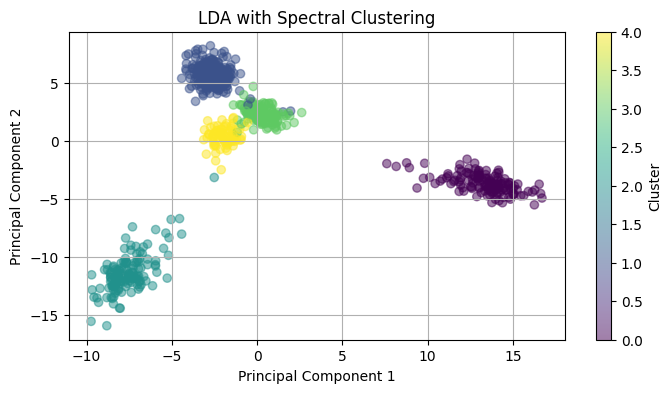

In [46]:
# Plot PCA results with cluster coloring
plt.figure(figsize=(8, 4))
plt.scatter(lda_fit_data[:, 0], lda_fit_data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('LDA with Spectral Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [47]:
def train_model(model):
    # Split data into features and target
    X = x_data
    y = labels['Class']

    # Initialize evaluation metrics lists
    accuracies = []
    balanced_accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Initialize KFold cross-validation
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    

    # Iterate over each fold of cross-validation
    for train_index, test_index in kf.split(X):
        # Split data into train and test sets for this fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        # Predict on the testing data
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='weighted'))
        recalls.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        

    # Calculate average evaluation metrics
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    # Print summary of model performance
    print("Average Accuracy:", avg_accuracy)
    print("Average Balanced Accuracy:", avg_balanced_accuracy)
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1)


In [48]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

In [49]:
# Train a decision tree model
model = DecisionTreeClassifier()
train_model(model)

Average Accuracy: 0.9650436953807741
Average Balanced Accuracy: 0.9592363776024603
Average Precision: 0.965714136810527
Average Recall: 0.9650436953807741
Average F1 Score: 0.9650315591999482


In [50]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

In [52]:
train_model(clf)

Average Accuracy: 0.9812734082397004
Average Balanced Accuracy: 0.980220175557204
Average Precision: 0.9822790274854483
Average Recall: 0.9812734082397004
Average F1 Score: 0.9812951715125745


In [53]:
# Train a random forest model
model = RandomForestClassifier()
train_model(model)

Average Accuracy: 0.99625468164794
Average Balanced Accuracy: 0.9959148936170212
Average Precision: 0.9963155690596904
Average Recall: 0.99625468164794
Average F1 Score: 0.9962507141788416


In [54]:
from sklearn.neural_network import MLPClassifier

In [55]:
Y_pred=[]
Y_test=[]
def train_model(model):
    # Split data into features and target
    X = x_data
    y = labels['Class']

    # Initialize evaluation metrics lists
    accuracies = []
    balanced_accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    # Initialize KFold cross-validation
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    

    # Iterate over each fold of cross-validation
    for train_index, test_index in kf.split(X):
        # Split data into train and test sets for this fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        # Predict on the testing data
        y_pred = model.predict(X_test)
        Y_pred=y_pred
        Y_test=y_test
        # Calculate evaluation metrics
        accuracies.append(accuracy_score(y_test, y_pred))
        balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='weighted'))
        recalls.append(recall_score(y_test, y_pred, average='weighted'))
        f1_score(y_test, y_pred, average='weighted')
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        

    # Calculate average evaluation metrics
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_balanced_accuracy = sum(balanced_accuracies) / len(balanced_accuracies)
    avg_precision = sum(precisions) / len(precisions)
    avg_recall = sum(recalls) / len(recalls)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    # Print summary of model performance
    print("Average Accuracy:", avg_accuracy)
    print("Average Balanced Accuracy:", avg_balanced_accuracy)
    print("Average Precision:", avg_precision)
    print("Average Recall:", avg_recall)
    print("Average F1 Score:", avg_f1)

In [56]:
ann_model = MLPClassifier(hidden_layer_sizes=(120, 50), max_iter=1000)
train_model(ann_model)

Average Accuracy: 0.99625468164794
Average Balanced Accuracy: 0.996638888888889
Average Precision: 0.9962754417899773
Average Recall: 0.99625468164794
Average F1 Score: 0.9962475436293542


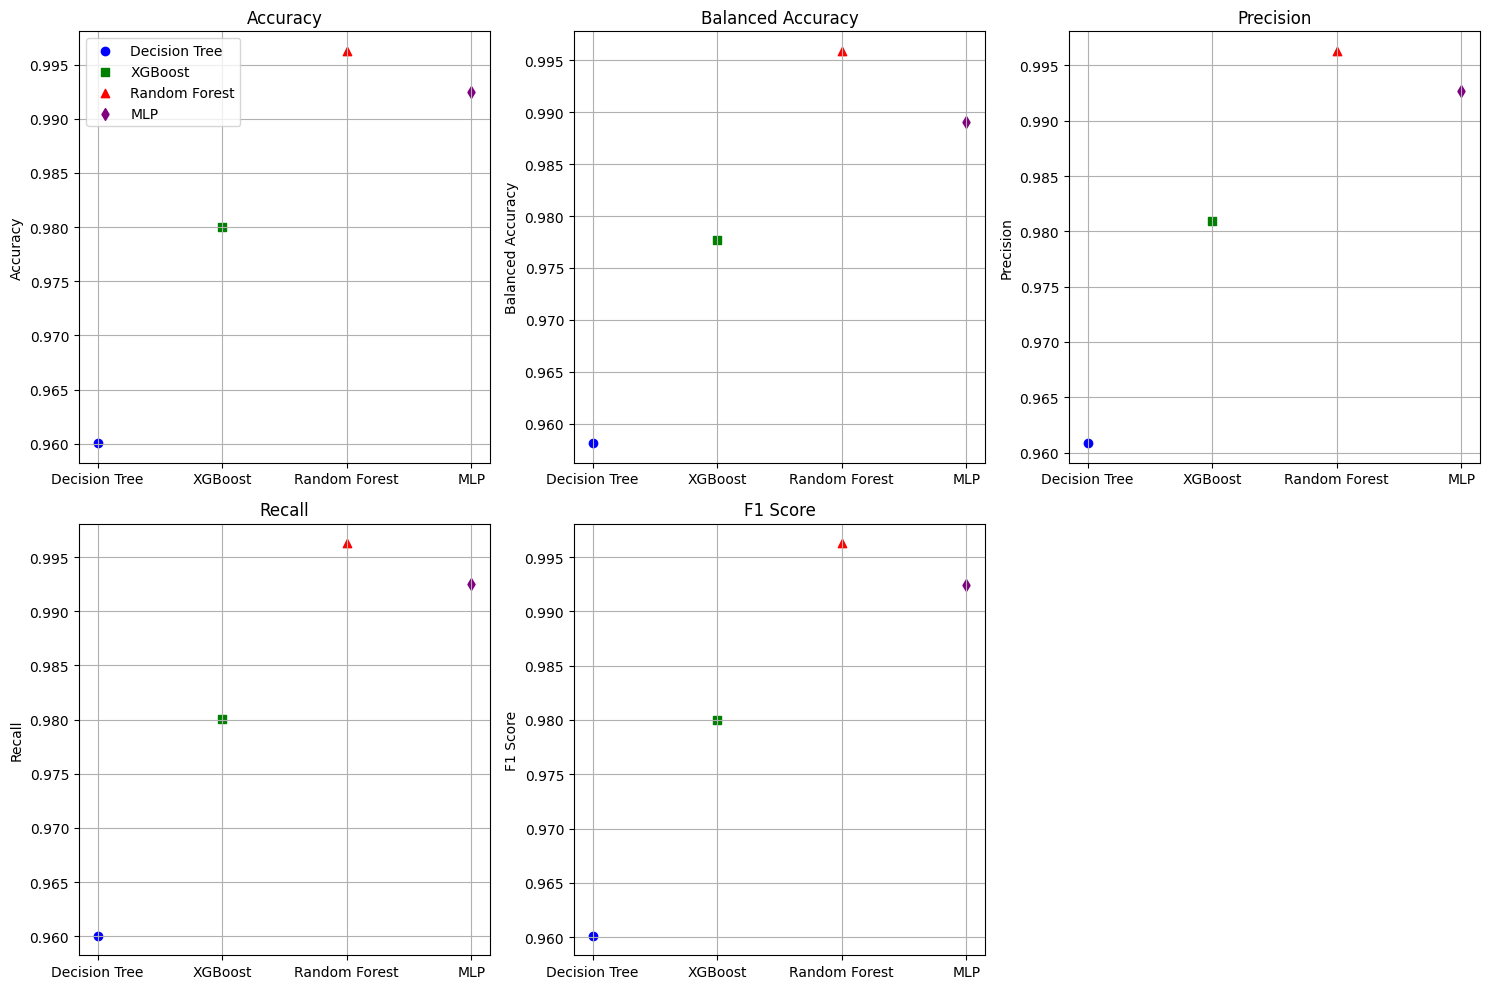

In [57]:
import matplotlib.pyplot as plt

# Metrics for decision tree
dt_metrics = {
    'Accuracy': 0.9600499375780274,
    'Balanced Accuracy': 0.9581194822884708,
    'Precision': 0.9608496885887027,
    'Recall': 0.9600499375780274,
    'F1 Score': 0.9601447018652273
}

# Metrics for xgboost
xgboost_metrics = {
    'Accuracy': 0.9800249687890137,
    'Balanced Accuracy': 0.9776832838774552,
    'Precision': 0.9809806504567341,
    'Recall': 0.9800249687890137,
    'F1 Score': 0.9799670322325335
}

# Metrics for random forest
random_forest_metrics = {
    'Accuracy': 0.99625468164794,
    'Balanced Accuracy': 0.9959148936170212,
    'Precision': 0.9963155690596904,
    'Recall': 0.99625468164794,
    'F1 Score': 0.9962507141788416
}

# Metrics for MLP classifier
mlp_metrics = {
    'Accuracy': 0.9925093632958801,
    'Balanced Accuracy': 0.9891013242077072,
    'Precision': 0.9927384153507749,
    'Recall': 0.9925093632958801,
    'F1 Score': 0.9924487046886137
}

metrics = ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score']
algorithms = ['Decision Tree', 'XGBoost', 'Random Forest', 'MLP']
colors = ['blue', 'green', 'red', 'purple']
markers = ['o', 's', '^', 'd']

plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    for j, (algorithm, data) in enumerate(zip(algorithms, [dt_metrics, xgboost_metrics, random_forest_metrics, mlp_metrics])):
        plt.scatter(algorithm, data[metric], color=colors[j], marker=markers[j], label=algorithm)
    plt.ylabel(metric)
    plt.title(metric)
    plt.grid(True)
    if i == 0:
        plt.legend()

plt.tight_layout()
plt.show()

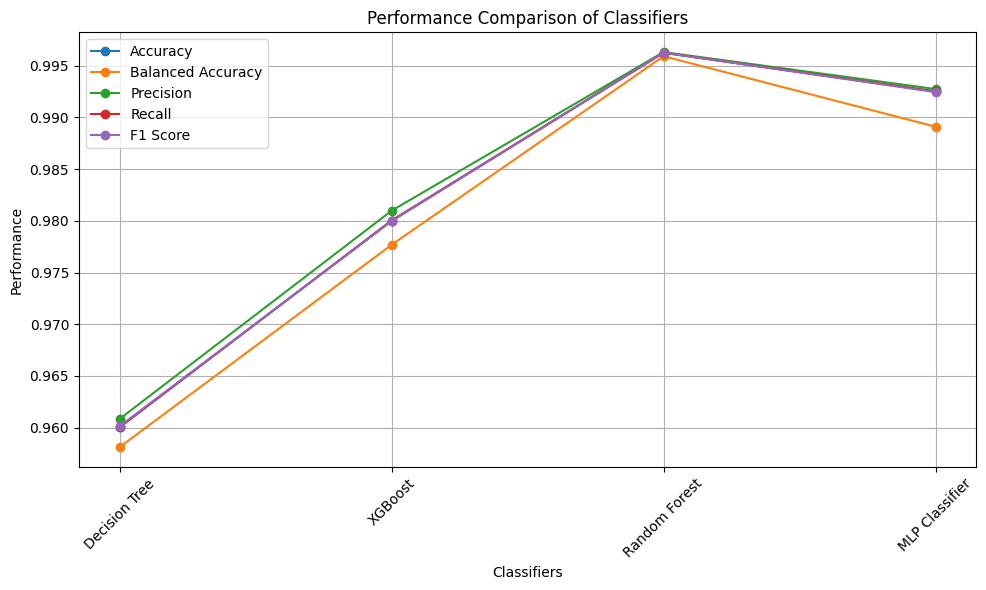

In [58]:
import matplotlib.pyplot as plt

# Define classifiers and their performance metrics
classifiers = ['Decision Tree', 'XGBoost', 'Random Forest','MLP Classifier']
accuracy = [0.9600499375780274, 0.9800249687890137, 0.99625468164794, 0.9925093632958801]
balanced_accuracy = [0.9581194822884708, 0.9776832838774552, 0.9959148936170212, 0.9891013242077072]
precision = [0.9608496885887027, 0.9809806504567341, 0.9963155690596904, 0.9927384153507749]
recall = [0.9600499375780274, 0.9800249687890137, 0.99625468164794, 0.9925093632958801]
f1_score = [0.9601447018652273, 0.9799670322325335, 0.9962507141788416, 0.9924487046886137]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot performance metrics for each classifier
ax.plot(classifiers, accuracy, marker='o', label='Accuracy')
ax.plot(classifiers, balanced_accuracy, marker='o', label='Balanced Accuracy')
ax.plot(classifiers, precision, marker='o', label='Precision')
ax.plot(classifiers, recall, marker='o', label='Recall')
ax.plot(classifiers, f1_score, marker='o', label='F1 Score')

# Set labels and title
ax.set_xlabel('Classifiers')
ax.set_ylabel('Performance')
ax.set_title('Performance Comparison of Classifiers')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


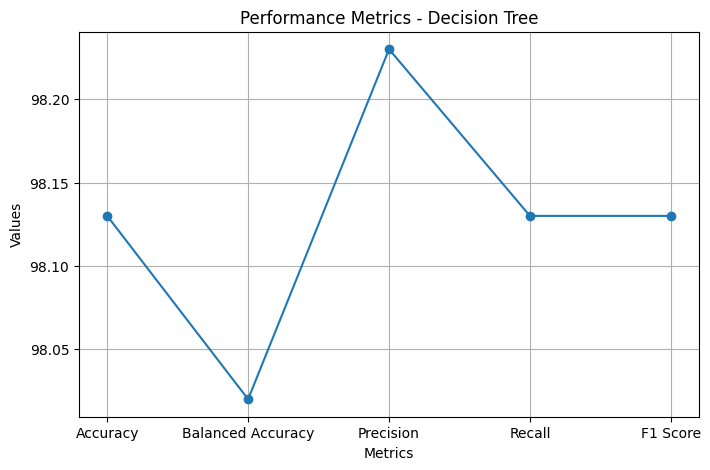

In [2]:
import matplotlib.pyplot as plt

# Define metrics and values for Decision Tree
metrics = ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [98.13, 98.02, 98.23, 98.13, 98.13]

# Create a line plot
plt.figure(figsize=(8, 5))
plt.plot(metrics, values, marker='o', linestyle='-')

# Add titles and labels
plt.title('Performance Metrics - Decision Tree')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Show the plot
plt.grid(True)
plt.show()

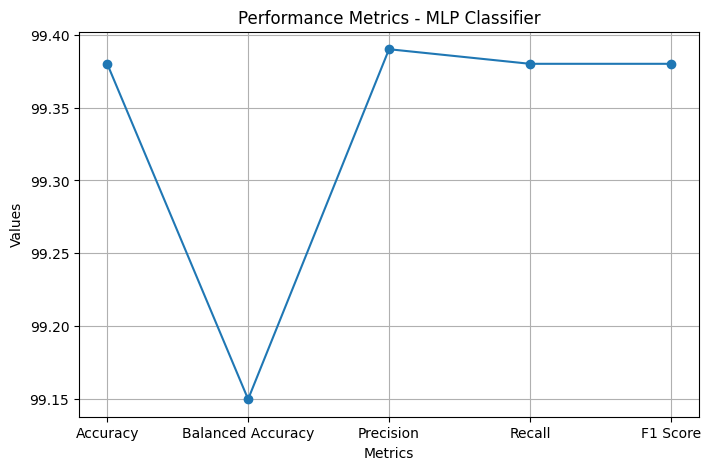

In [3]:
import matplotlib.pyplot as plt

# Define metrics and values for MLP Classifier
metrics = ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [99.38, 99.15, 99.39, 99.38, 99.38]

# Create a line plot
plt.figure(figsize=(8, 5))
plt.plot(metrics, values, marker='o', linestyle='-')

# Add titles and labels
plt.title('Performance Metrics - MLP Classifier')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Show the plot
plt.grid(True)
plt.show()

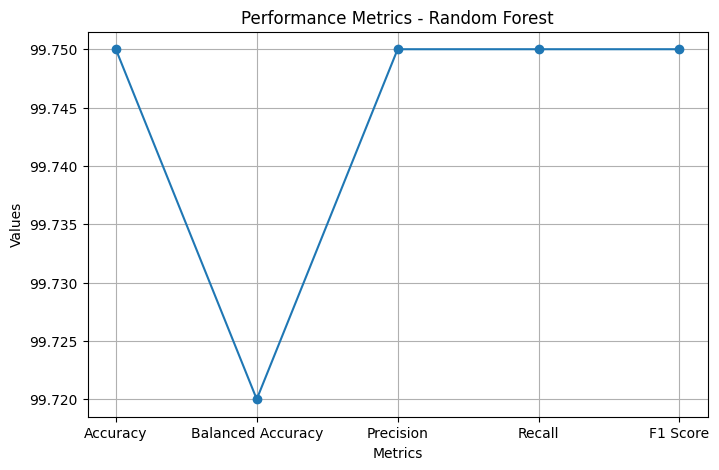

In [4]:
import matplotlib.pyplot as plt

# Define metrics and values for Random Forest
metrics = ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [99.75, 99.72, 99.75, 99.75, 99.75]

# Create a line plot
plt.figure(figsize=(8, 5))
plt.plot(metrics, values, marker='o', linestyle='-')

# Add titles and labels
plt.title('Performance Metrics - Random Forest')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Show the plot
plt.grid(True)
plt.show()